In [1]:
#hide
from chitra.core import *

# chitra

<p align="center">
<img src="../chitra_banner.png" alt="chitra">
</p>

## What is chitra?

**chitra** (**चित्र**) is an image utility library for Deep Learning tasks. *(It is not image-processing library)*

chitra reduces image data loading boilerplates for classification and object-detection.

It can also generate bounding-boxes from the annotated dataset.

If you have more use cases please [**raise an issue**](https://github.com/aniketmaurya/chitra/issues/new/choose) with the feature you want.

## Installation

### Using pip (recommended)

`pip install -U chitra`

### From source

```
git clone https://github.com/aniketmaurya/chitra.git
cd chitra
pip install -e .
```

## Usage

### Loading data for image classification



In [2]:
import numpy as np
import tensorflow as tf
import chitra
from chitra.dataloader import Clf, show_batch
import matplotlib.pyplot as plt

In [ ]:
path = '/Users/aniket/Pictures/data/train'

clf_dl = Clf()
data = clf_dl.from_folder(path, target_shape=(224, 224))

clf_dl.show_batch(8, figsize=(8,8))

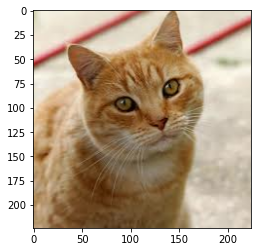

In [ ]:
for e in data.take(1):
    image = e[0].numpy().astype('uint8')
    label = e[1].numpy()
plt.imshow(image)
plt.show()

## Visualization

### Image annotation

Thanks to [**fizyr**](https://github.com/fizyr/keras-retinanet) keras-retinanet.

In [ ]:
from chitra.visualization import draw_annotations

labels = np.array([label])
bbox = np.array([[30, 50, 170, 190]])
label_to_name = lambda x: 'Cat' if x==0 else 'Dog'

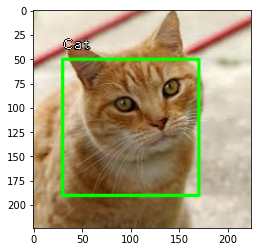

In [ ]:
draw_annotations(image, ({'bboxes': bbox, 'labels':labels,}), label_to_name=label_to_name)
plt.imshow(image)
plt.show()

## Utils

In [ ]:
from chitra.utils import limit_gpu

# limit the amount of GPU required for your training
limit_gpu(gpu_id=0, memory_limit=1024*2)

No GPU found in your system!


## Image datagenerator
Dataset class provides the flexibility to load image dataset by updating components of the class.

Components of Dataset class are:
- image file generator
- resizer
- label generator
- image loader

These components can be updated with custom function by the user according to their dataset structure. For example the Tiny Imagenet dataset is organized as-

```
train_folder/
    folder1/
               file.txt
               folder2/
                     image1.jpg
                     image2.jpg
                     .
                     .
                     .
                     imageN.jpg
                    
                      
```

The inbuilt file generator search for images on the `folder1`, now we can just update the `image file generator` and rest of the functionality will remain same.

Dataset also support progressive resizing of images.

In [13]:
from chitra.datagenerator import Dataset
from glob import glob

In [14]:
ds = Dataset('/data/aniket/tiny-imagenet/data/tiny-imagenet-200/train')
# it will load the folders and NOT images
ds.filenames[:3]

No item present in the image size list


['/data/aniket/tiny-imagenet/data/tiny-imagenet-200/train/n03584254',
 '/data/aniket/tiny-imagenet/data/tiny-imagenet-200/train/n02403003',
 '/data/aniket/tiny-imagenet/data/tiny-imagenet-200/train/n02056570']

In [15]:
def new_image_fileloader(path): return glob(f'{path}/*/images/*')

ds.update_component('get_filenames', new_image_fileloader)
ds.filenames[:3]

get_filenames updated with <function new_image_fileloader at 0x7f52094dce60>


['/data/aniket/tiny-imagenet/data/tiny-imagenet-200/train/n03584254/images/n03584254_251.JPEG',
 '/data/aniket/tiny-imagenet/data/tiny-imagenet-200/train/n03584254/images/n03584254_348.JPEG',
 '/data/aniket/tiny-imagenet/data/tiny-imagenet-200/train/n03584254/images/n03584254_465.JPEG']

### Progressive resizing

In [19]:
image_sz_list = [(28, 28), (32, 32), (64, 64)]

ds = Dataset('/data/aniket/tiny-imagenet/data/tiny-imagenet-200/train', image_size=image_sz_list)
ds.update_component('get_filenames', new_image_fileloader)

# first call to generator
for img, label in ds.generator():
    print('first call to generator:', img.shape)
    break

# seconds call to generator
for img, label in ds.generator():
    print('seconds call to generator:', img.shape)
    break

# third call to generator
for img, label in ds.generator():
    print('third call to generator:', img.shape)
    break


get_filenames updated with <function new_image_fileloader at 0x7f52094dce60>
first call to generator: (28, 28, 3)
seconds call to generator: (32, 32, 3)
third call to generator: (64, 64, 3)


## Contributing

Contributions of any kind are welcome. Please check the [**Contributing Guidelines**](https://github.com/aniketmaurya/chitra/blob/master/CONTRIBUTING.md) before contributing.